<a href="https://colab.research.google.com/github/MAHABUB51/MiningApplicationsMLDL-2/blob/main/Mahabub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Linear Algebra
import pandas as pd
#Data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the data, so we have to convert the date column into date
# and we have to drop the duplicates entries/row using code below
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MiningProcess_Flotation_Plant_Database.csv',
                   decimal=",",
                    parse_dates=["date"],
                    infer_datetime_format=True).drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736282 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          736282 non-null  datetime64[ns]
 1   % Iron Feed                   736282 non-null  float64       
 2   % Silica Feed                 736282 non-null  float64       
 3   Starch Flow                   736282 non-null  float64       
 4   Amina Flow                    736282 non-null  float64       
 5   Ore Pulp Flow                 736282 non-null  float64       
 6   Ore Pulp pH                   736282 non-null  float64       
 7   Ore Pulp Density              736282 non-null  float64       
 8   Flotation Column 01 Air Flow  736282 non-null  float64       
 9   Flotation Column 02 Air Flow  736282 non-null  float64       
 10  Flotation Column 03 Air Flow  736282 non-null  float64       
 11  Flotation Col

In [ ]:
#Check the shape of data (row and column)
data.shape

(736282, 24)

In [ ]:
#check the data if there any missing value or not
data.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [ ]:
#Display the data, and observe what kind of the data is this
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


<ipython-input-6-92cabcc1612f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor= data.corr()


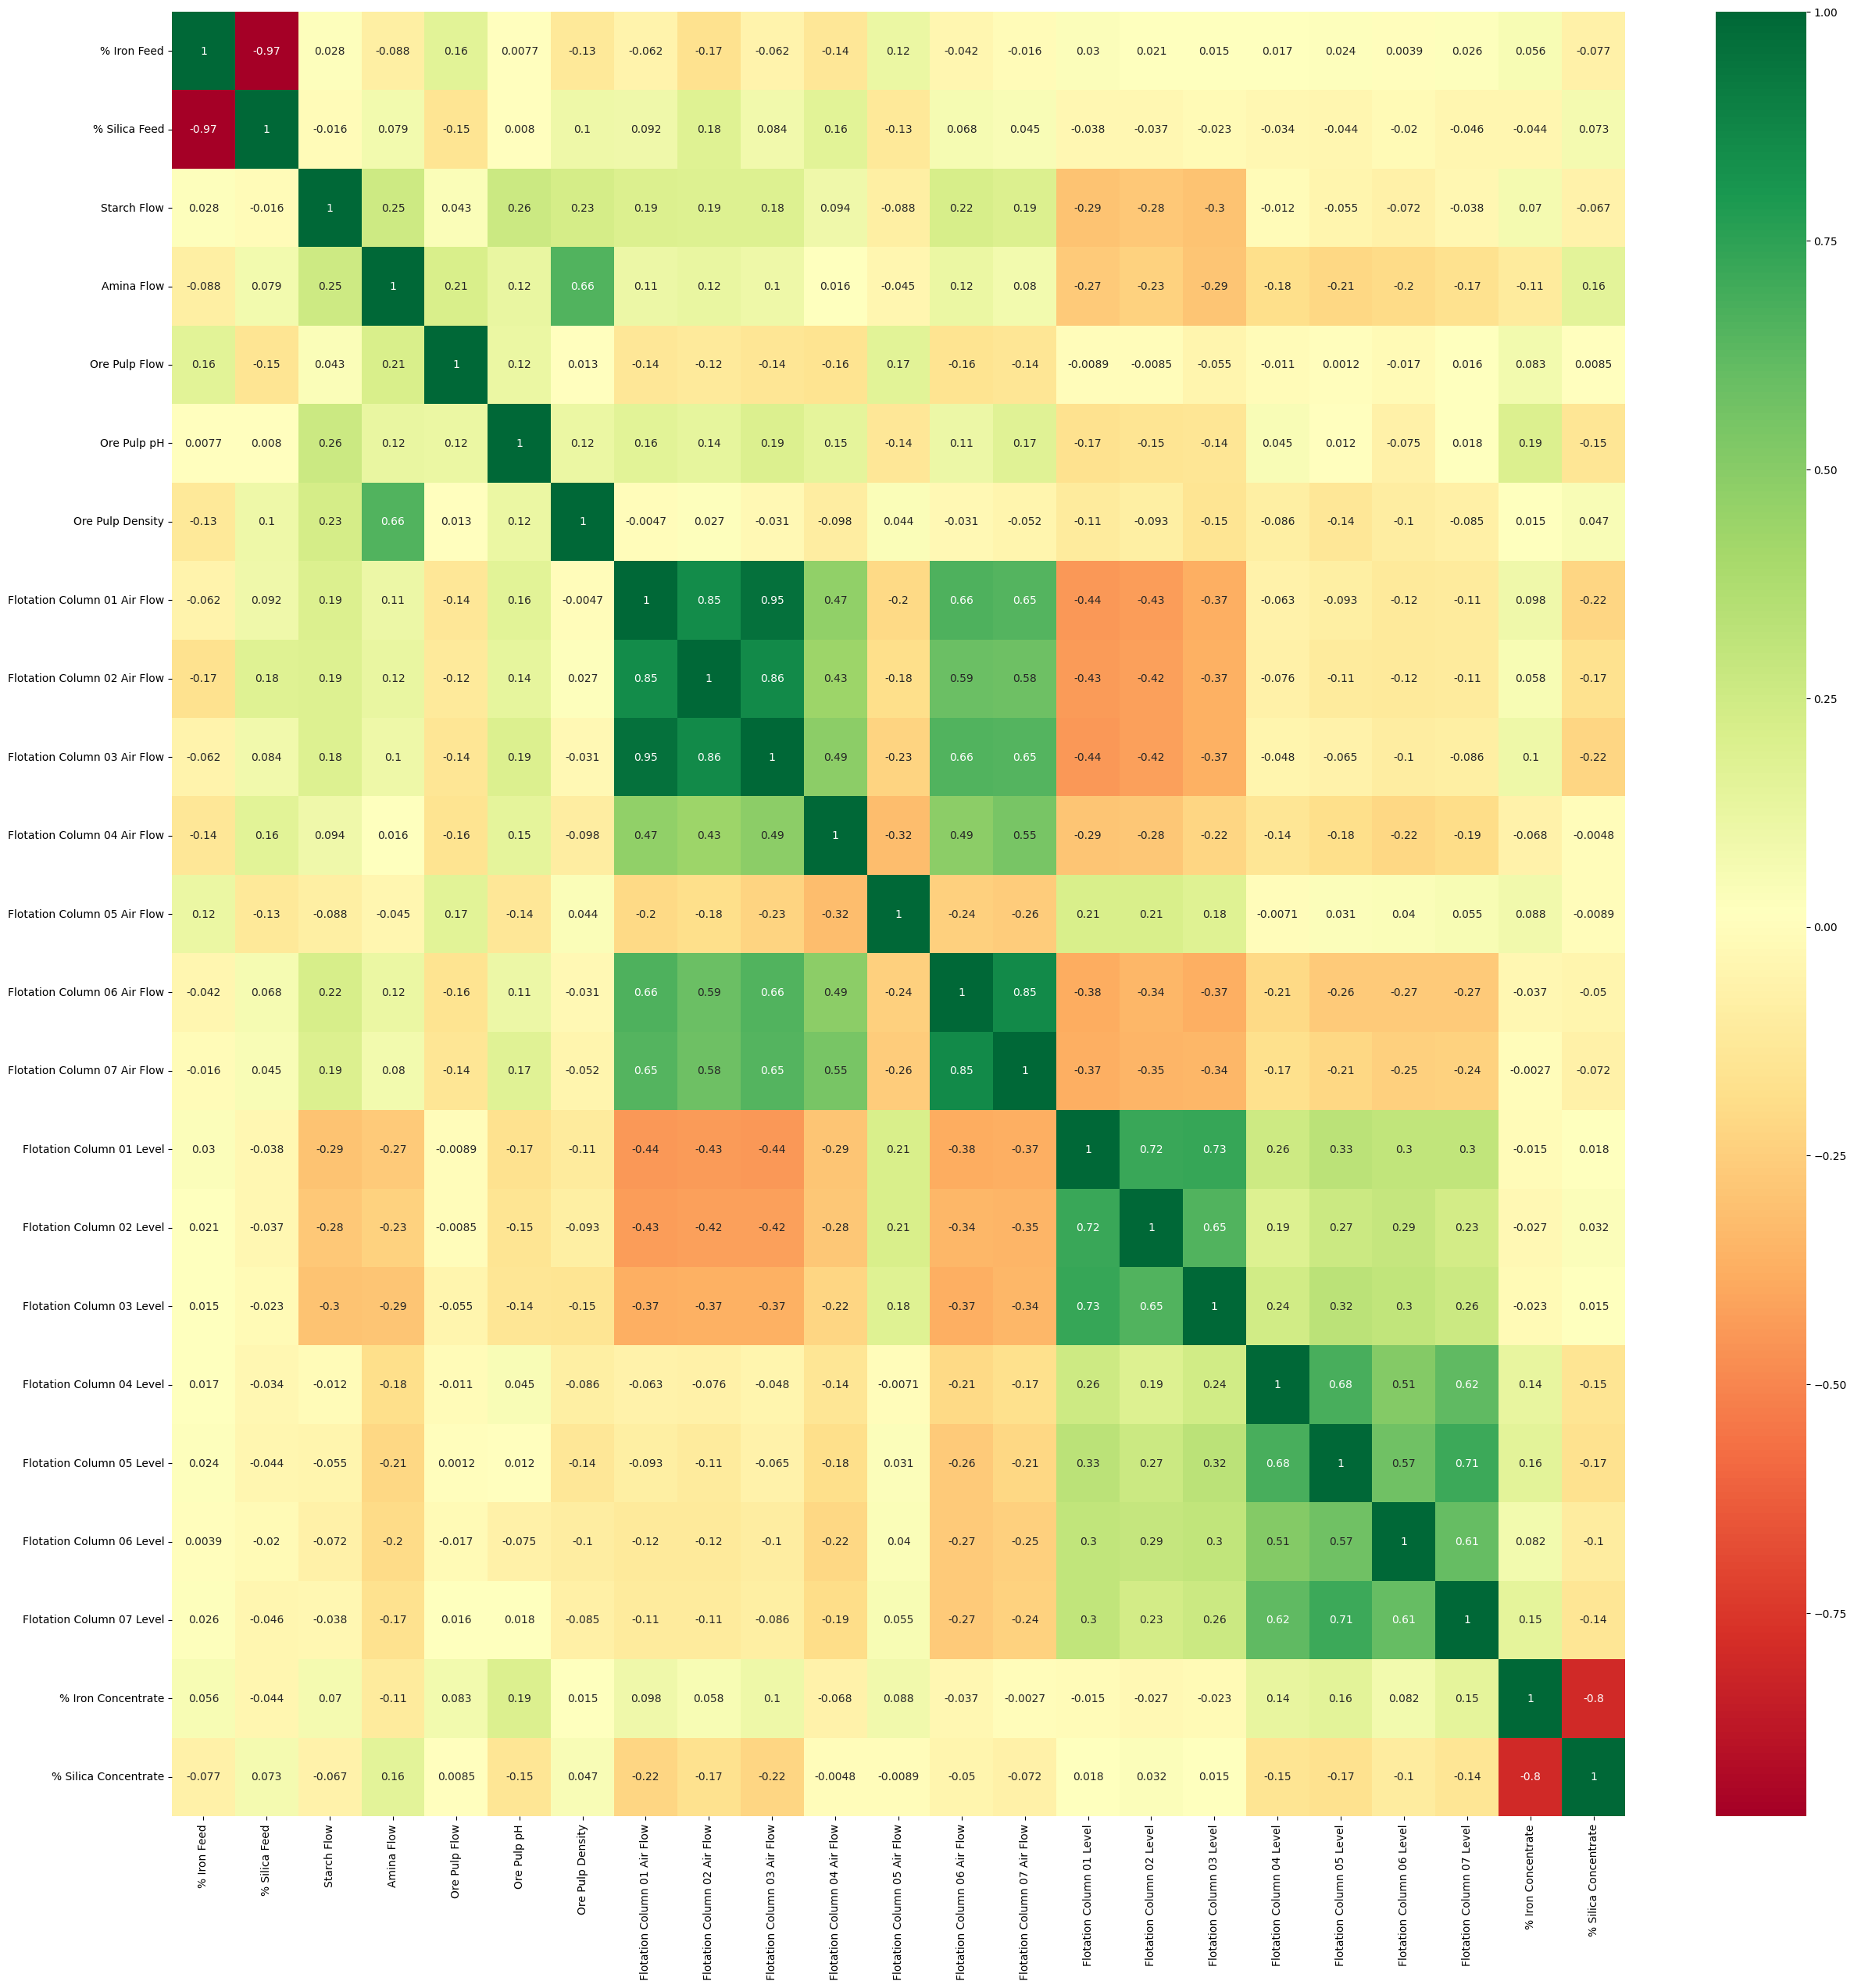

In [ ]:
#We use heatmap to visualize the corealtion between each features
plt.figure(figsize=(30, 30))
cor= data.corr()
corelation = sns.heatmap(cor, annot=True, cmap="RdYlGn")

In [ ]:
#Drop data that there are no significant corelation on dependent feature
#Make Correlation with output variable
cor_target = abs(cor["% Silica Concentrate"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15]
relevant_features

Amina Flow                      0.156981
Flotation Column 01 Air Flow    0.219076
Flotation Column 02 Air Flow    0.167259
Flotation Column 03 Air Flow    0.218834
Flotation Column 05 Level       0.168466
% Iron Concentrate              0.800598
% Silica Concentrate            1.000000
Name: % Silica Concentrate, dtype: float64

In [ ]:
#We pick the 2 biggest corelation exclude target
relevant_features = relevant_features.nlargest(n=3)

In [ ]:
#Make a data from the relevant features
data = pd.DataFrame(data, columns=relevant_features.index)
data.head()

,% Silica Concentrate,% Iron Concentrate,Flotation Column 01 Air Flow
0,1.31,66.91,249.214
1,1.31,66.91,249.719
2,1.31,66.91,249.741
3,1.31,66.91,249.917
4,1.31,66.91,250.203


<Axes: >

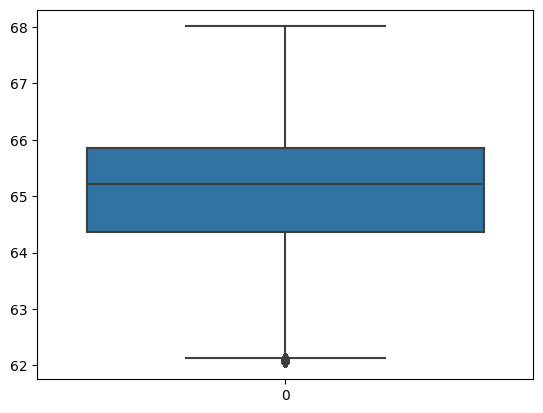

In [ ]:
#Checking The Outlier in our data
sns.boxplot(data['% Iron Concentrate'])

<Axes: >

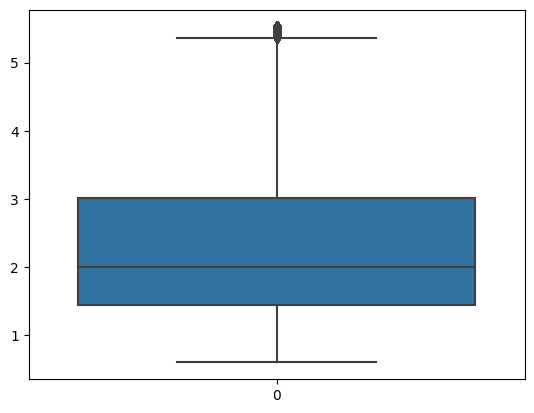

In [ ]:
#Checking The Outlier in our data
sns.boxplot(data['% Silica Concentrate'])

In [ ]:
#Dropping the outlier with Percentiles
for i in data:
    upper_lim = data[i].quantile(.95)
    lower_lim = data[i].quantile(.05)

    data = data[(data[i] < upper_lim) & (data[i] > lower_lim)]

In [ ]:
# Before we split into train and test data, as we can see, the data have differents in units and magnitude
# So to make it at the same magnitude we can scaling the data
y = data['% Silica Concentrate']
X = data.drop(['% Silica Concentrate'], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
# After we scaled the data, and the data have the same magnitude
# we can split the data into Train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.3,
                                                   random_state=30)

In [ ]:
#Modelling,Linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_linreg = lin_reg.predict(X_test)

In [ ]:
#Ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
y_pred_lasso = lasso_regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.510e+02, tolerance: 2.305e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e+04, tolerance: 2.305e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.667e+02, tolerance: 2.310e

In [ ]:
#XGBOOST
import xgboost as xgb
xgb = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:57:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [ ]:
#Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#LINEAR REGRESSION
MSE = mean_squared_error(y_test, y_pred_linreg)
print('Our Linear Regression mean squared error is: ',MSE)
MAE = mean_absolute_error(y_test, y_pred_linreg)
print('Our Linear Regression mean absolute error is: ',MAE)
R2 = r2_score(y_test, y_pred_linreg)
print('Our Linear Regression R2 score is: ', R2)
print('Our Linear Regreesion Root Mean Squared Error is:', np.sqrt(mean_squared_error(y_test, y_pred_linreg)))
print('-'*100)
print('-'*100)
#RIDGE REGRESSION
MSE = mean_squared_error(y_test, y_pred_ridge)
print('Our Rdige Regression mean squared error is: ',MSE)
MAE = mean_absolute_error(y_test, y_pred_ridge)
print('Our Ridge Regression mean absolute error is: ',MAE)
R2 = r2_score(y_test, y_pred_ridge)
print('Our Ridge Regression R2 score is: ', R2)
print('Our Ridge Regression Root Mean Squared Error is:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('-'*100)
print('-'*100)
#LASSO REGRESSION
MSE = mean_squared_error(y_test, y_pred_lasso)
print('Our Lasso Regression mean squared error is: ',MSE)
MAE = mean_absolute_error(y_test, y_pred_lasso)
print('Our Lasso Regression mean absolute error is: ',MAE)
R2 = r2_score(y_test, y_pred_lasso)
print('Our Lasso Regression R2 score is: ', R2)
print('Our Lasso Regression Root Mean Squared Error is:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('-'*100)
print('-'*100)
#XGBOOST
MSE = mean_squared_error(y_test, y_pred_xgb)
print('Our XGBoost mean squared error is: ',MSE)
MAE = mean_absolute_error(y_test, y_pred_xgb)
print('Our XGBoost mean absolute error is: ',MAE)
R2 = r2_score(y_test, y_pred_xgb)
print('Our XGBoost R2 score is: ', R2)
print('Our XGBoost Root Mean Squared Error is:', np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

Our Linear Regression mean squared error is:  0.3474323919345132
Our Linear Regression mean absolute error is:  0.4574184735544686
Our Linear Regression R2 score is:  0.5449059569937886
Our Linear Regreesion Root Mean Squared Error is: 0.5894339589254365
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Our Rdige Regression mean squared error is:  0.34743238424167056
Our Ridge Regression mean absolute error is:  0.4574184336890651
Our Ridge Regression R2 score is:  0.5449059670704739
Our Ridge Regression Root Mean Squared Error is: 0.5894339523998177
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Our Lasso Regression mean squared error is:  0.3474323918898882
Our Lasso Regression mean

In [ ]:
#Cecking Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,% Iron Concentrate,Flotation Column 01 Air Flow
vif,1.000079,1.000079


<ipython-input-21-3881ecce9756>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: xlabel='% Silica Concentrate', ylabel='Density'>

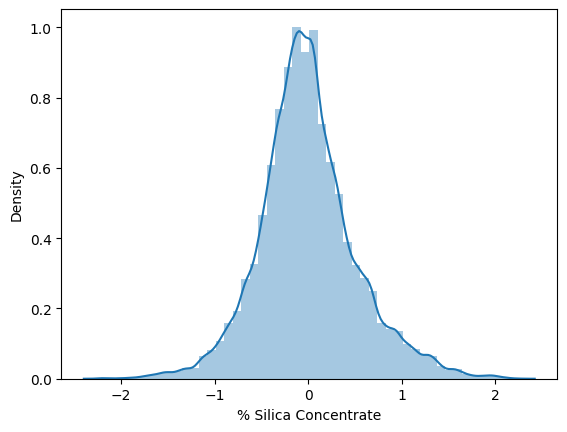

In [ ]:
#Checking Normality
residual = y_test - y_pred_xgb
sns.distplot(residual)

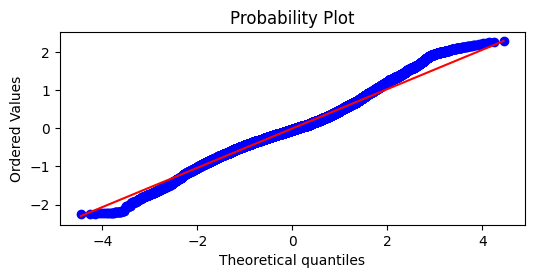

In [ ]:
#Checking Normality
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [ ]:
#Checking Homoscedacity
sns.scatterplot(y_pred_xgb, residual)
plt.hlines(y=0, xmin= 1, xmax=5)
plt.xlabel('Residual')
plt.ylabel('Prediksi')
plt.title('Residual Plot')

TypeError: ignored

In [ ]:
# Hyper Parameter Tunning
from sklearn.model_selection import RandomizedSearchCV

params={
 "learning_rate"    : [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 0.9, 1.0 ]

}

In [ ]:
#Using Randomized Search CV to look the best parameter
random_search= RandomizedSearchCV(estimator=xgb,
                                param_distributions=params,
                                cv=5, n_iter=50,
                                scoring = 'r2',n_jobs = 4,
                                verbose = 1,
                                return_train_score = True,
                                random_state=42)

In [ ]:
#Train Hyperparameter into our Data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:09:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          objective='reg:linear', ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             0.9, 1.0],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2, 0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=1)

In [ ]:
#Check the best estimator
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [ ]:
#Using the best hyperparameter into our model
import xgboost as xgb
xgb = xgb.XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.25, max_delta_step=0, max_depth=10,
             min_child_weight=7, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)
xgb.fit(X_train, y_train)
y_pred_xgb_tunning = xgb.predict(X_test)

[18:25:19] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Check Metrics after tunning
MSE = mean_squared_error(y_test, y_pred_xgb_tunning)
print('Our XGBoost after tunning mean squared error is: ',MSE)
MAE = mean_absolute_error(y_test, y_pred_xgb_tunning)
print('Our XGBoost after tunning mean absolute error is: ',MAE)
R2 = r2_score(y_test, y_pred_xgb_tunning)
print('Our XGBoost after tunning R2 score is: ', R2)
print('Our XGBoost after tunning Root Mean Squared Error is:', np.sqrt(mean_squared_error(y_test, y_pred_xgb_tunning)))

Our XGBoost after tunning mean squared error is:  0.23511351181618323
Our XGBoost after tunning mean absolute error is:  0.35646582190099046
Our XGBoost after tunning R2 score is:  0.6920299858569795
Our XGBoost after tunning Root Mean Squared Error is: 0.4848850501058815


In [ ]:
#Visualize The Actual Data and our Prediction
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb_tunning})
result.head(20)

,Actual,Predicted
65750,3.040000,3.266945
538991,3.120000,2.569989
496489,1.210000,1.660527
541623,3.710000,2.423223
421087,2.210000,1.947904
551281,4.570000,3.801206
500937,2.010000,3.054207
391225,2.400000,2.257400
646696,4.696579,3.720869
280795,1.190000,1.495035


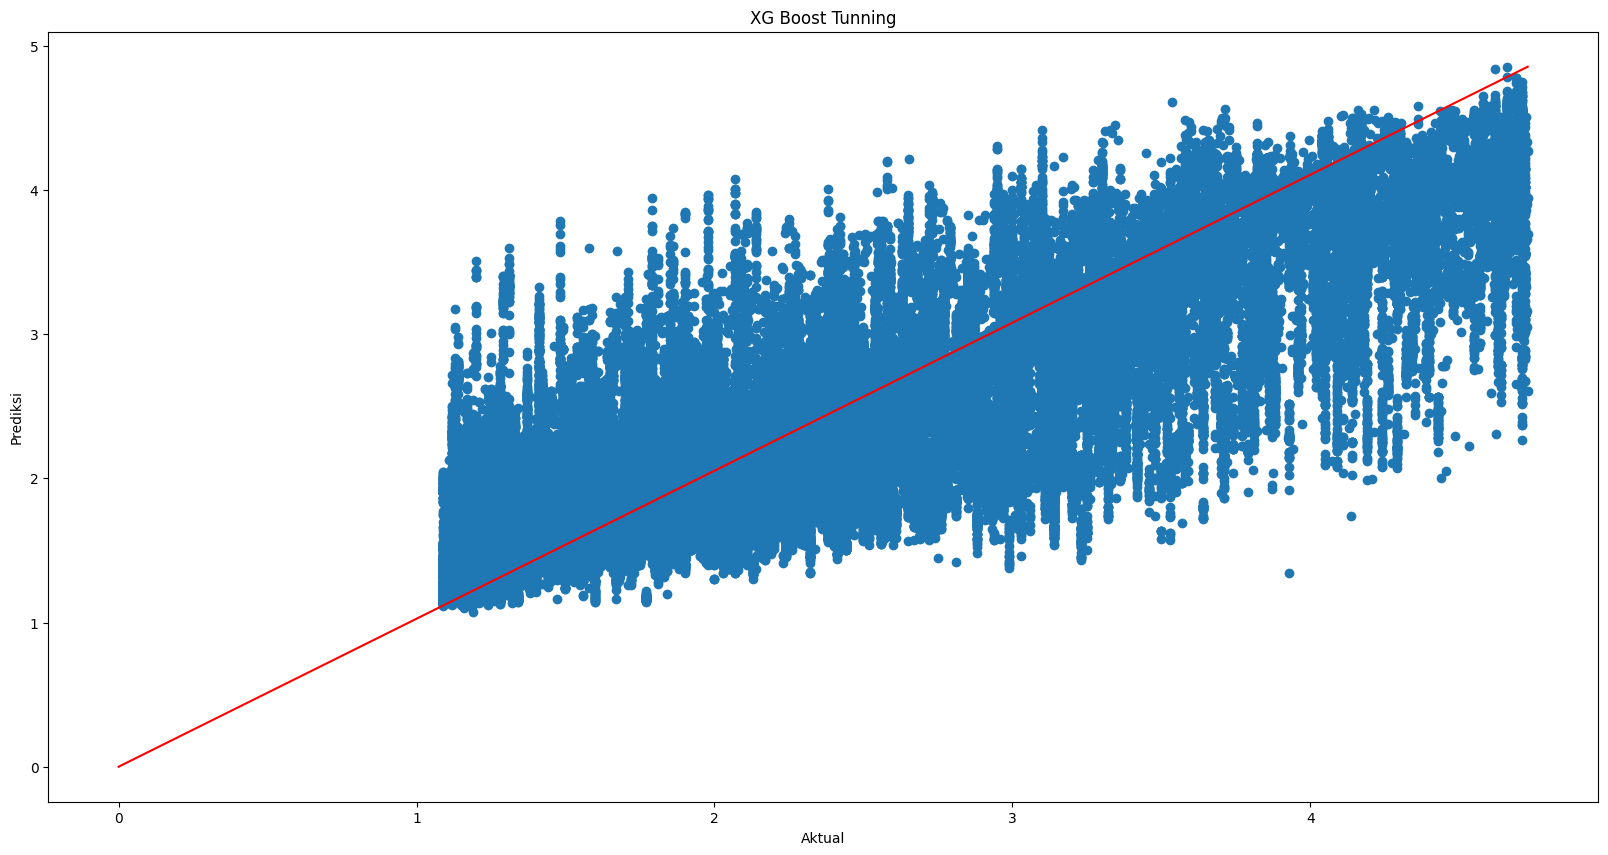

In [ ]:
#Visualize using scatter plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="XG Boost Tunning", xlabel="Aktual", ylabel="Prediksi")
ax.scatter(y_test, y_pred_xgb_tunning)
ax.plot([0,max(y_test)], [0,max(y_pred_xgb_tunning)], color='r')
fig.show()